#### 학습목표
- XGBoost 를 이용한 분류 알고리즘
- breast Cancer 데이서 세트 활용

In [5]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier



from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer 


# XGBoost
# conda install -c conda-forge xgboost
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier 
xgboost.__version__

'1.3.3'

In [7]:
# 사이키런 래퍼 XGBoost 사용
dataset = load_breast_cancer()
# dataset.keys()

features = dataset.data
labels   = dataset.target

In [9]:
cancerDF = pd.DataFrame(data = features , 
                        columns = dataset.feature_names)
cancerDF['target'] = labels
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
cancerDF['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [12]:
X_train , X_test , y_train , y_test = train_test_split(features , labels , test_size=.2 , random_state=150) 

In [13]:
X_train.shape , X_test.shape

((455, 30), (114, 30))

In [17]:
xgb_model = XGBClassifier(n_estimators = 400 , 
                          learning_rate = 0.1 , 
                          max_depth = 3 )


In [18]:
xgb_model.fit(X_train , y_train , 
              early_stopping_rounds = 400 , 
              eval_set=[(X_test , y_test)] , 
              eval_metric = 'logloss' , 
              verbose = True) 

[0]	validation_0-logloss:0.61256
[1]	validation_0-logloss:0.54848
[2]	validation_0-logloss:0.49271
[3]	validation_0-logloss:0.44553
[4]	validation_0-logloss:0.40399
[5]	validation_0-logloss:0.36926
[6]	validation_0-logloss:0.33855
[7]	validation_0-logloss:0.31281
[8]	validation_0-logloss:0.28674
[9]	validation_0-logloss:0.26667
[10]	validation_0-logloss:0.24768
[11]	validation_0-logloss:0.22930
[12]	validation_0-logloss:0.21541
[13]	validation_0-logloss:0.20192
[14]	validation_0-logloss:0.18850
[15]	validation_0-logloss:0.17656
[16]	validation_0-logloss:0.16676
[17]	validation_0-logloss:0.15939
[18]	validation_0-logloss:0.15165
[19]	validation_0-logloss:0.14396
[20]	validation_0-logloss:0.13674
[21]	validation_0-logloss:0.13091
[22]	validation_0-logloss:0.12606
[23]	validation_0-logloss:0.12161
[24]	validation_0-logloss:0.11730
[25]	validation_0-logloss:0.11405
[26]	validation_0-logloss:0.11211
[27]	validation_0-logloss:0.11032
[28]	validation_0-logloss:0.10797
[29]	validation_0-loglos

[238]	validation_0-logloss:0.07993
[239]	validation_0-logloss:0.08015
[240]	validation_0-logloss:0.07997
[241]	validation_0-logloss:0.07995
[242]	validation_0-logloss:0.08000
[243]	validation_0-logloss:0.08005
[244]	validation_0-logloss:0.08018
[245]	validation_0-logloss:0.08016
[246]	validation_0-logloss:0.08009
[247]	validation_0-logloss:0.08031
[248]	validation_0-logloss:0.08044
[249]	validation_0-logloss:0.08041
[250]	validation_0-logloss:0.08055
[251]	validation_0-logloss:0.08053
[252]	validation_0-logloss:0.08062
[253]	validation_0-logloss:0.08084
[254]	validation_0-logloss:0.08082
[255]	validation_0-logloss:0.08097
[256]	validation_0-logloss:0.08117
[257]	validation_0-logloss:0.08126
[258]	validation_0-logloss:0.08101
[259]	validation_0-logloss:0.08084
[260]	validation_0-logloss:0.08108
[261]	validation_0-logloss:0.08092
[262]	validation_0-logloss:0.08089
[263]	validation_0-logloss:0.08095
[264]	validation_0-logloss:0.08089
[265]	validation_0-logloss:0.08087
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
xgb_pred       = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[: , 1 ]

In [20]:
xgb_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1])

In [21]:
xgb_pred_proba

array([9.9842983e-01, 6.3077742e-01, 9.9944144e-01, 3.2277388e-04,
       4.4466701e-04, 9.9629456e-01, 7.2782558e-01, 9.9798334e-01,
       9.9949551e-01, 8.3694159e-04, 9.9944180e-01, 9.9921191e-01,
       9.9963117e-01, 9.9291575e-01, 7.0996501e-04, 6.5546395e-04,
       9.9663049e-01, 5.1768951e-04, 5.8532873e-04, 9.9940073e-01,
       9.9730420e-01, 9.9964535e-01, 6.7770535e-01, 4.4327631e-04,
       9.9917728e-01, 9.8346013e-01, 9.9844068e-01, 9.9769056e-01,
       5.2008545e-03, 9.9962151e-01, 9.9949598e-01, 2.3154467e-03,
       9.9788922e-01, 9.9738520e-01, 9.9920553e-01, 9.9247509e-01,
       9.9878222e-01, 4.1227839e-03, 9.8924017e-01, 5.5379089e-04,
       9.9614370e-01, 9.9740595e-01, 5.5970880e-04, 9.9807358e-01,
       9.9775678e-01, 9.3740565e-01, 9.9910319e-01, 9.9934870e-01,
       9.9938214e-01, 7.9290319e-04, 9.7014207e-01, 9.8586094e-01,
       9.8530722e-01, 9.9747473e-01, 9.9669915e-01, 1.6934890e-02,
       9.9958616e-01, 9.9636251e-01, 5.0187185e-03, 9.6414033e

In [22]:
def metrics_evaluation(y_test, y_pred=None , y_pred_proba=None) :
    print("정확도 : {} , 정밀도 : {} , 재현율 : {} , 조화평균(F1) : {} , AUC : {} "
          .format(accuracy_score(y_test, y_pred) , 
                  precision_score(y_test, y_pred) , 
                  recall_score(y_test, y_pred) , 
                  f1_score(y_test, y_pred) , 
                  roc_auc_score(y_test, y_pred_proba) ) )

In [23]:
metrics_evaluation(y_test , xgb_pred , xgb_pred_proba)

정확도 : 0.9824561403508771 , 정밀도 : 0.972972972972973 , 재현율 : 1.0 , 조화평균(F1) : 0.9863013698630138 , AUC : 0.9950396825396824 


In [24]:
# early_stopping_rounds 를 10으로 설정하고 재 학습
xgb_model.fit(X_train , y_train , 
              early_stopping_rounds = 10 , 
              eval_set=[(X_test , y_test)] , 
              eval_metric = 'logloss' , 
              verbose = True) 

xgb_pred       = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[: , 1 ]
metrics_evaluation(y_test , xgb_pred , xgb_pred_proba)

[0]	validation_0-logloss:0.61256
[1]	validation_0-logloss:0.54848
[2]	validation_0-logloss:0.49271
[3]	validation_0-logloss:0.44553
[4]	validation_0-logloss:0.40399
[5]	validation_0-logloss:0.36926
[6]	validation_0-logloss:0.33855
[7]	validation_0-logloss:0.31281
[8]	validation_0-logloss:0.28674
[9]	validation_0-logloss:0.26667
[10]	validation_0-logloss:0.24768
[11]	validation_0-logloss:0.22930
[12]	validation_0-logloss:0.21541
[13]	validation_0-logloss:0.20192
[14]	validation_0-logloss:0.18850
[15]	validation_0-logloss:0.17656
[16]	validation_0-logloss:0.16676
[17]	validation_0-logloss:0.15939
[18]	validation_0-logloss:0.15165
[19]	validation_0-logloss:0.14396
[20]	validation_0-logloss:0.13674
[21]	validation_0-logloss:0.13091
[22]	validation_0-logloss:0.12606
[23]	validation_0-logloss:0.12161
[24]	validation_0-logloss:0.11730
[25]	validation_0-logloss:0.11405
[26]	validation_0-logloss:0.11211
[27]	validation_0-logloss:0.11032
[28]	validation_0-logloss:0.10797
[29]	validation_0-loglos

<Figure size 1080x864 with 0 Axes>

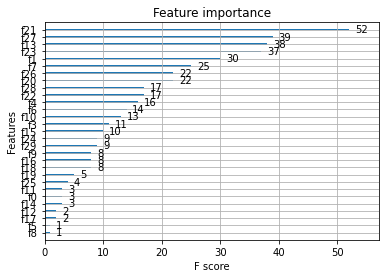

In [27]:
plt.figure(figsize=(15, 12))

plot_importance(xgb_model)

plt.show()
plt.close()